In [21]:
import import_ipynb
import T1_Sprint4
import matplotlib.pyplot as plt
import numpy as np

Ja està neta la base de dades, ja puc començar els exercicis.


### Resumeix estadísticament i gràficament

In [65]:
llog_m[["Nom_Districte","Nom_Barri","Preu"]].describe(include="all")

,Nom_Districte,Nom_Barri,Preu
count,292,292,292.000000
unique,10,73,NaN
top,Nou Barris,Can Baró,NaN
freq,52,4,NaN
mean,NaN,NaN,859.588907
std,NaN,NaN,217.345484
min,NaN,NaN,447.500000
25%,NaN,NaN,735.800000
50%,NaN,NaN,804.950000
75%,NaN,NaN,927.750000


Hi han 73 barris distribuits en 10 districtes. Nou Barris és el districte que apareix més cops (52) i tots els barris apareixen 4 cops. El preu màxim que es paga són 1816,5 per mes i el mínim 447,5. Mentres que la mitjana del preu del lloguer a Barcelona és de 859,59€ amb desviació estàndar de 217,35€. El 25% de les dades son inferiors a 735,8€, el 50% costen menys de 804,95€ i el 75% costen menys de 927,75€.

### Crea almenys una visualització per:

### 1. Una variable categòrica (Districte o Barri)

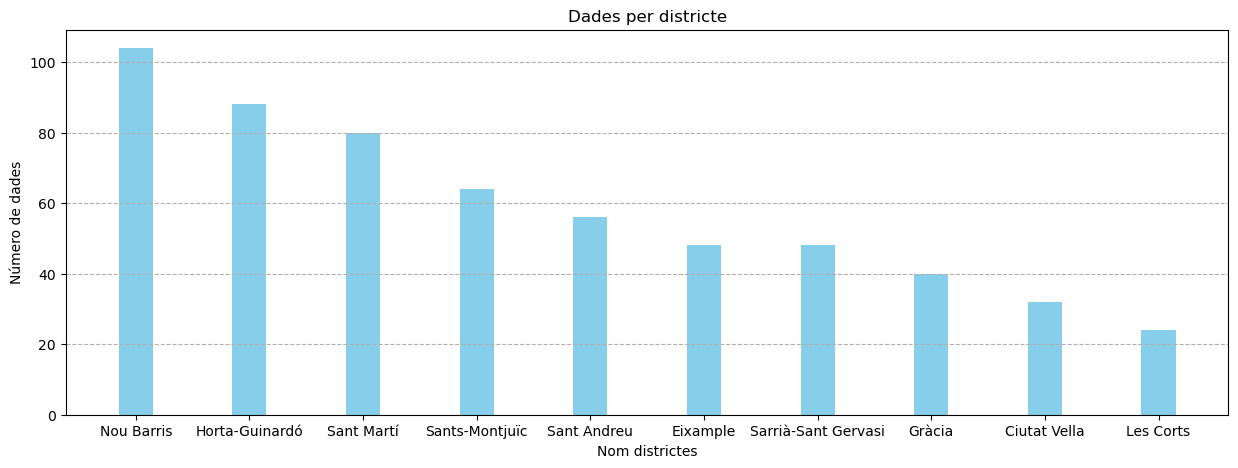

In [191]:
freq=df["Nom_Districte"].value_counts() # compta freq
x=freq.index # nom de cada districte
y=freq.values # array amb el num de dades per cada districte
plt.title("Dades per districte") #Titol
plt.xlabel("Nom districtes") # eix x
plt.ylabel("Número de dades") #eix y
plt.bar(x,y,color="skyblue",width=0.3) #config barres
plt.grid(axis="y",linestyle="--") 
plt.savefig('var_categorica.png')

plt.show()

In [37]:
freq.values

array([104,  88,  80,  64,  56,  48,  48,  40,  32,  24], dtype=int64)

He fet un gràfic de barres vertical amb una variable categòrica, la freqüència. El gràfic indica que el districte de Nou Barris és el que apareix més cops (104) dintre de la base de dades, segurament degut a que conté més barris. El que menys apareix és el districte de Les Corts.


### 2. Una variable numèrica (Preu)

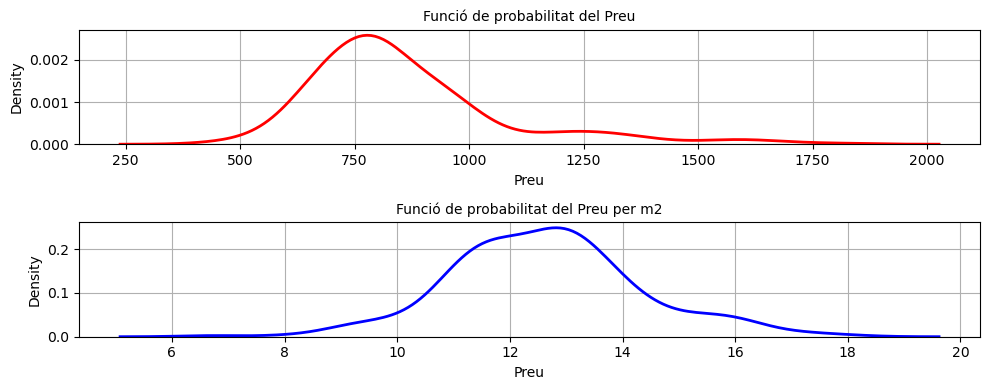

In [192]:
import seaborn as sns # importa llibrería seaborn 
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(10,4)) # se li asigna dos variables als subplots que es colocarán en una mateixa columna.

#Primer subplot

sns.kdeplot(data=llog_m["Preu"], ax=ax1, linewidth=2, color="red") # utilitza la llibrería seaborn
ax1.set_title("Funció de probabilitat del Preu", size=10) #Títol del primer subplot


#Segon subplot 
sns.kdeplot(data=llog_m_sup["Preu"], ax=ax2, linewidth=2, color="blue")
ax2.set_title("Funció de probabilitat del Preu per m2", size=10)# Títol del segon subplot

ax1.grid()# funció grid al primer subplot
ax2.grid() # funció grid al segon subplot
plt.tight_layout() # Ajustar espai entre subplots
plt.savefig('var_numèrica.png')

plt.show() #mostra gràfiques

He creat una funció de densitat de probabilitat en base a la columna Preu de la base de dades "Llog_m". Com es pot veure a la gràfica, la mediana està entorn de 800€ i la funció sembla una Gamma ja que presenta una cola a la seva dreta. 

Per l'altra banda, he creat una altra gràfica en base a la columna Preu de la basa de dades "Llog_m_sup". Com es pot veure la mediana està entorn del 13€/m2 i sembla seguir una distribució Normal. 


### 3. Una variable numèrica i una categòrica (Districte i Preu)

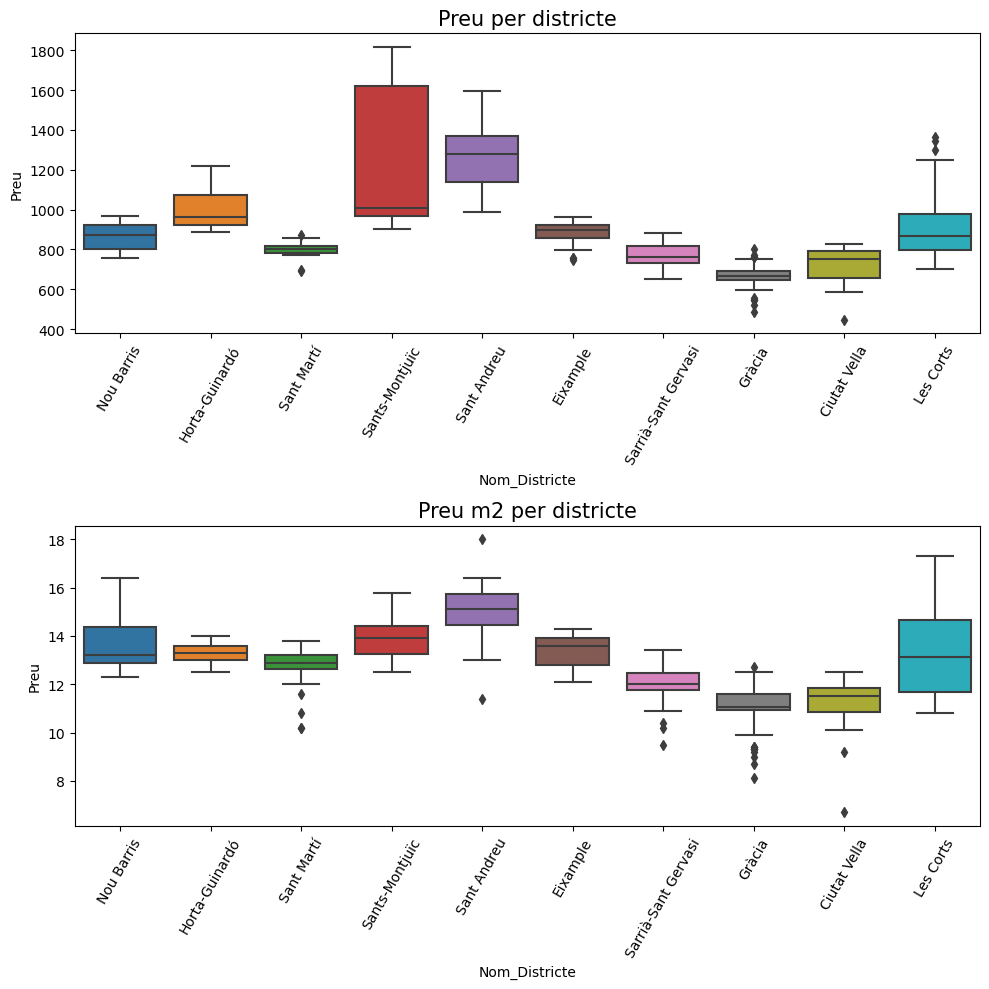

In [193]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(10,10))
#Primer subplot
sns.boxplot(x=llog_m["Nom_Districte"], y=llog_m["Preu"], ax=ax1) # utilitza la llibrería seaborn
ax1.set_title("Preu per districte", size=15)
ax1.set_xticklabels(x,rotation = 60)#per veure amb més claretat el nom de cada districte
#Segon subplot
sns.boxplot(x=llog_m_sup["Nom_Districte"], y=llog_m_sup["Preu"], ax=ax2) # utilitza la llibrería seaborn
ax2.set_title("Preu m2 per districte", size=15)
ax2.set_xticklabels(x,rotation = 60)
plt.tight_layout() 
plt.savefig('var_num_i_categ.png')

plt.show()

Cada caixa és un resum estadístic del districte al que representa. La seva altura ve determinada per el preu. Per exemple en la segona gràfica la caixa del districte de Sant Gervasi és la que es situa més adalt ja que és el districte més car per m2. D'igual manera, les seves dimensions venen determinades per la distància del rang entre el primer quatil i el tercer quartil. 

El primer quatil es tractaria de la linea inferior de la caixa i ens indica que el 25% dels valors es troben per sota d'aquest. El tercer quatil es tractaria de la linia superior de la caixa i ens indica que el 75% dels valors es troben per sota d'aquest. La caixa també ens indica la mediana o el segón quatil que és la linea negra horitzontal que la talla. 

És important comentar que quant més llarga sigui la caixa, major serà la desviació estàndar de les dades.

Les linies en forma de T que es troben per sobre i per sota de la caixa, conegudes com "bigotis", representen el límit per a la detecció de valors atípics. 
Els punts negres en forma de rombe son els valors atípics.

Per exemple. A la segona gràfica el districte de Sant Gervasi té una mediana d'uns 13€/m2, el 25% de les seves dades es situen per sota dels 12€/m2 i el 75% per sota dels 15€/m2. A més la seva desviació estàndar és gran ja que el rang entre quatils és elvat. 
Per acabar, si observem la caixa del districte de Sant Andre podem veure uns punts negres més abaix del bigoti. Un indica que una dada es situa en uns 2€ per m2, és obvi que es tracta d'un valor atípic que ni tan sols es comptabilitza ja que pot conduir a un error.

### 4. Dues variables numèriques (Any o Trimestre i Preu)

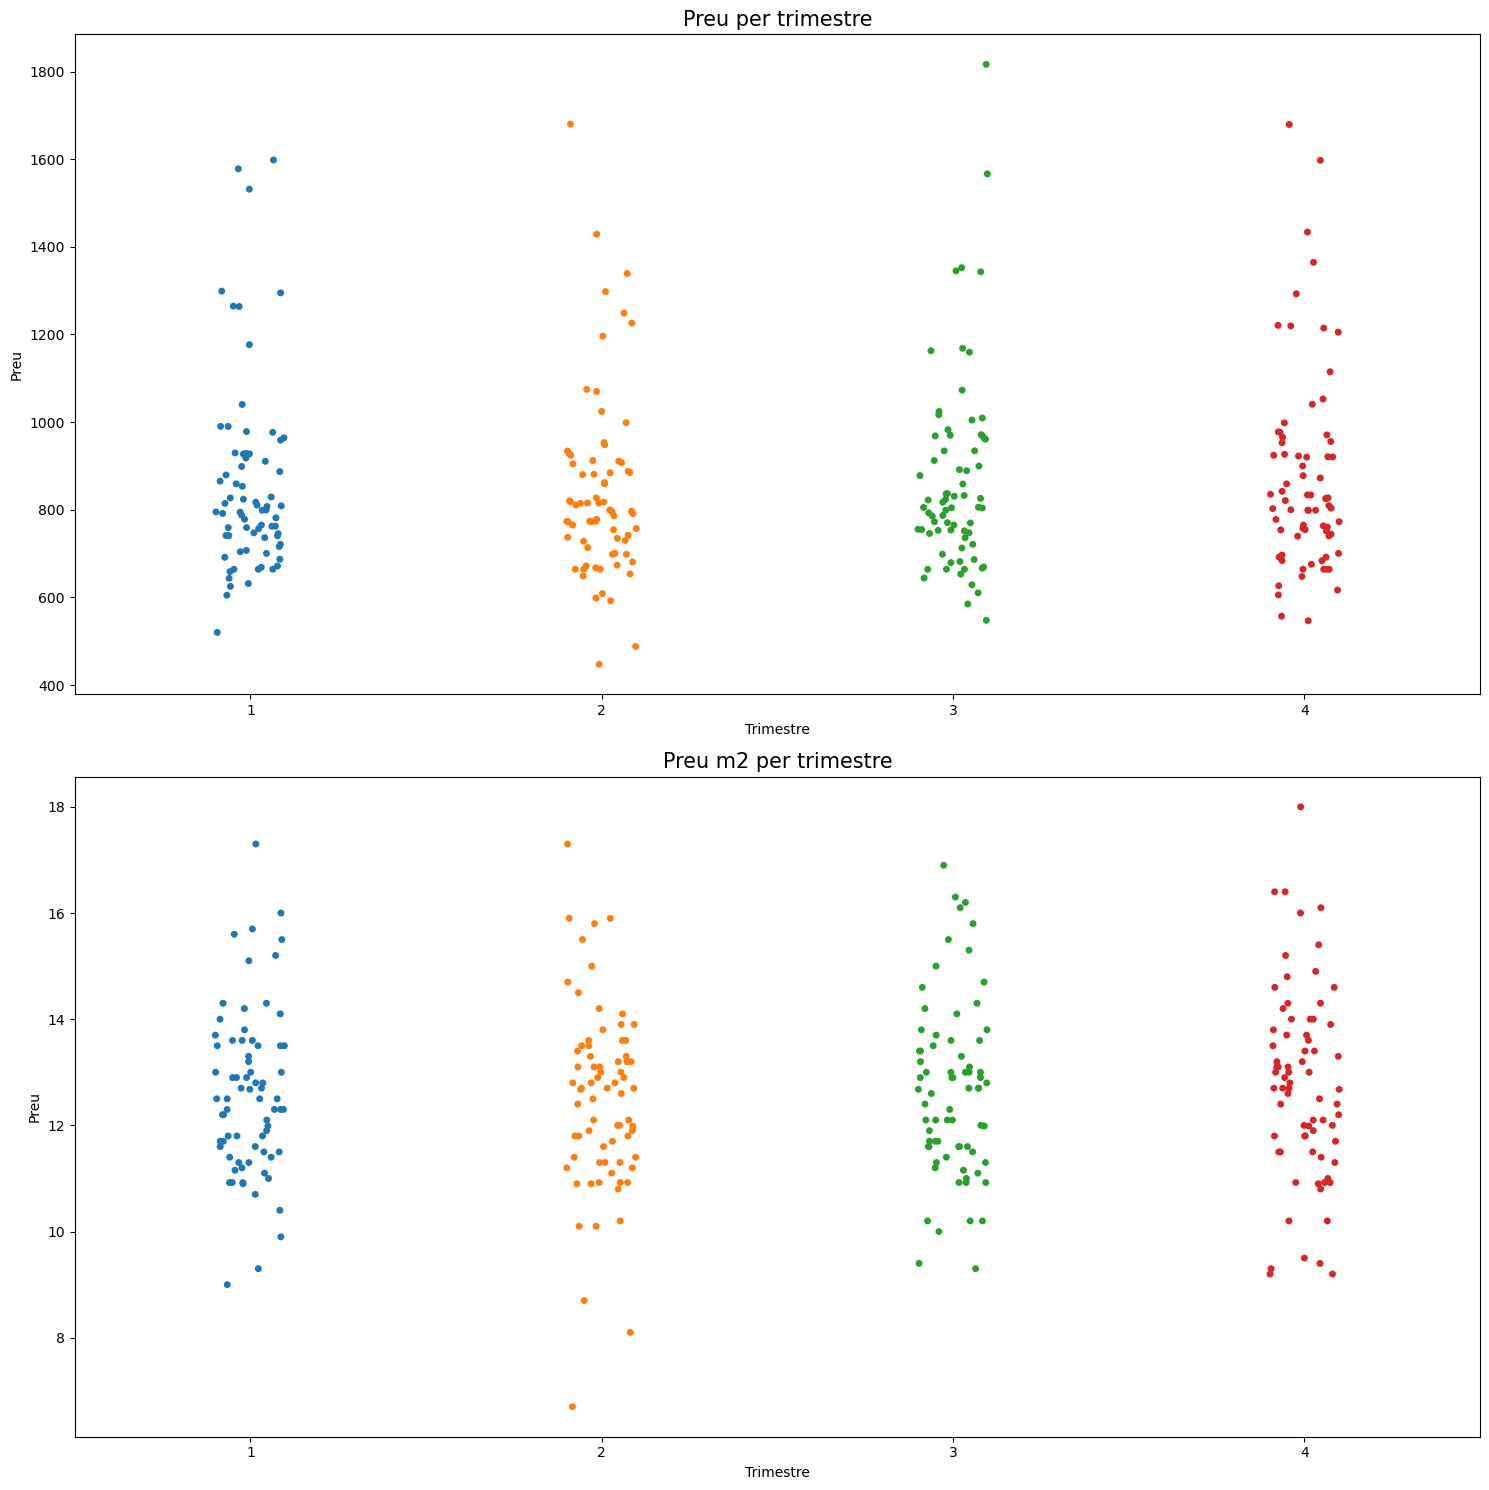

In [189]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(15,15))
#Primer subplot
sns.stripplot(x=llog_m["Trimestre"], y=llog_m["Preu"], ax=ax1) # utilitza la llibrería seaborn
ax1.set_title("Preu per trimestre", size=15)
#Segon subplot
sns.stripplot(x=llog_m_sup["Trimestre"], y=llog_m_sup["Preu"], ax=ax2) # utilitza la llibrería seaborn
ax2.set_title("Preu m2 per trimestre", size=15)
plt.tight_layout()
plt.savefig('var_numèriques.png')

plt.show()

En aquest gràfic, cada punt correspon a una dada dintre de un trimestre. Allà on hi han més punts és on es situa la mitjana i si anem més cap a dalt o cap a baix podem veure com es dispersen més les dades. 
La distribució dels quatre trimestres sembla molt semblant. En qualsevol cas, no sembla molt fàcil saber on està la mitjana degut a les poques dades. Pot ser si juntesim totes les dades en un sol any ho veuriem més clar.

Ja que amb aquest tipus de gràfica costa visualitzar el que ens interessa, utilitzarem un altre tipus

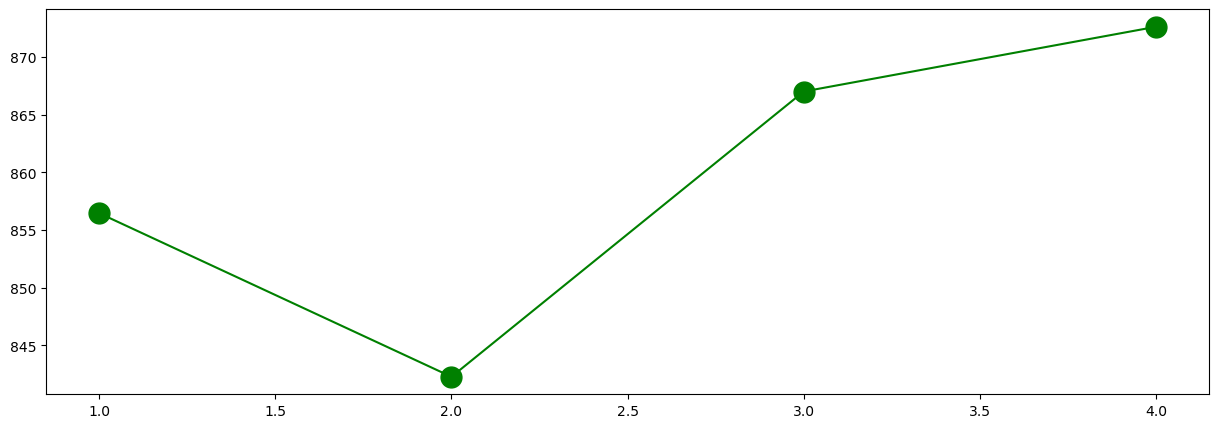

In [190]:
plt.plot(llog_m.groupby('Trimestre')['Preu'].mean(),marker = 'o', ms = 15,color='green')
plt.savefig('tres_variables2.png')


Ara es pot veure millor la evolució dels preus mensuals de lloguer als barris de Barcelona durant l'any 2021.

### 5. Tres variables (Barri o Districte, Trimestre i Preu)

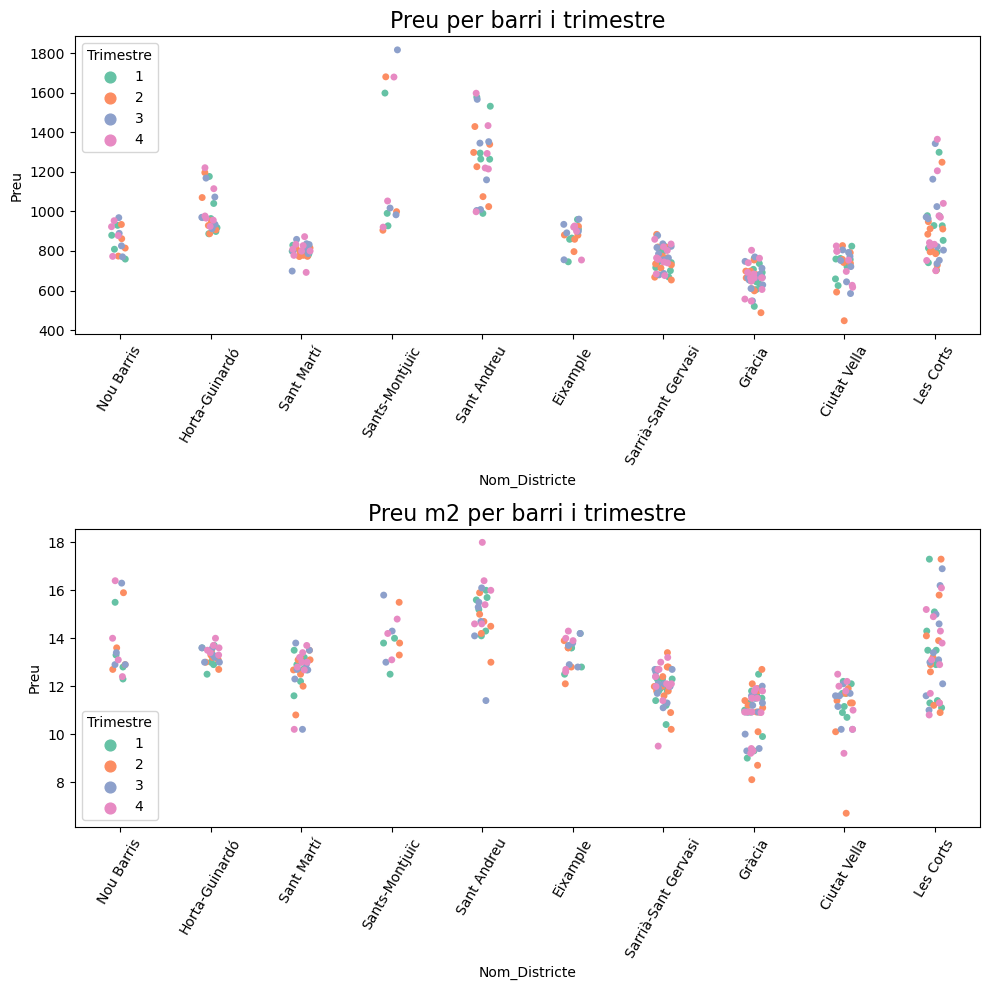

In [188]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
sns.stripplot(x=llog_m["Nom_Districte"], y=llog_m["Preu"], hue=llog_m["Trimestre"], palette="Set2", ax=ax1)# Primer subplot
# Asigna Nom_Districte a l'eix x, el Preu a l'eix y i el trimestre serà la representada amb colors a l'eix y.
sns.stripplot(x=llog_m_sup["Nom_Districte"], y=llog_m_sup["Preu"], hue=llog_m_sup["Trimestre"], palette="Set2", ax=ax2)#Segón subplot
ax1.set_xticklabels(x,rotation = 60) #Per veure millor el nom dels districtes
ax1.set_title("Preu per barri i trimestre", size=16) #títol subplot 1
ax2.set_title("Preu m2 per barri i trimestre", size=16) #títol subplot 2

ax2.set_xticklabels(x,rotation = 60)
plt.tight_layout() # separar els dos subplots
plt.savefig('tres_variables.png')
plt.show()

Aquests gràfics mostren la mitjana del preus per cada districte. Per afegir la tercera variable se li assigna un color a cada trimestre i així es pot saber la mitjana de preus per cada trimestre ademés de per cada districte.
Al principi he probat de fer el gràfic amb la llibreria matplotlib i la funció scatter, però no aconseguia que la gràfica es visualitzes bé. Per aquesta raó, al final m'he decantat per la funció stripplot de la llibrería seaborn.

## Exercici 2
### Exporta els gràfics com imatges o com HTML.

He exportat totes les gràfiques en format imatge png. He utilitzat la funció savefig de la llibreria matplotlib. Les funcions son a cada exercici.

## Exercici 3
### Proposa alguna visualització que creguis que pot resultar interessant.

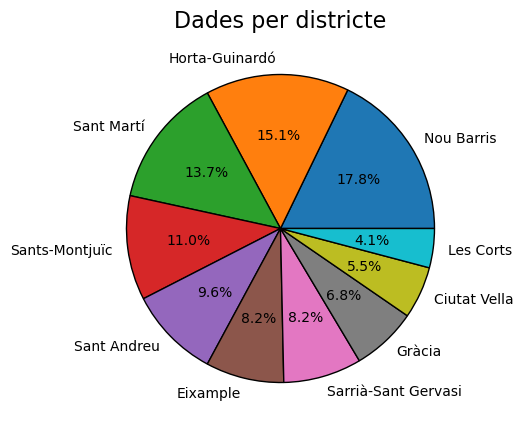

In [216]:
freq_districte=df["Nom_Districte"].value_counts() #compta la frequencia de cada districte
plt.pie(freq_districte.values, labels=freq_districte.index, autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
# percentatges per cada districte, nom de cada districte, mostra percentatge, grosor linia, color linia negre.
plt.title("Dades per districte", size=16)
plt.savefig('grafic_pastis.png')
plt.show()

Aquest gràfic mostra de forma molt visual el percentatge de dades que conté cada districte. La funció és la mateixa que la del .1 però és més comode de veure.

Com estic interessat a comprarme una casa al districte de Sarrià-Sant Gervasi, faré una comparativa entre el preu per m2 del seus barris.

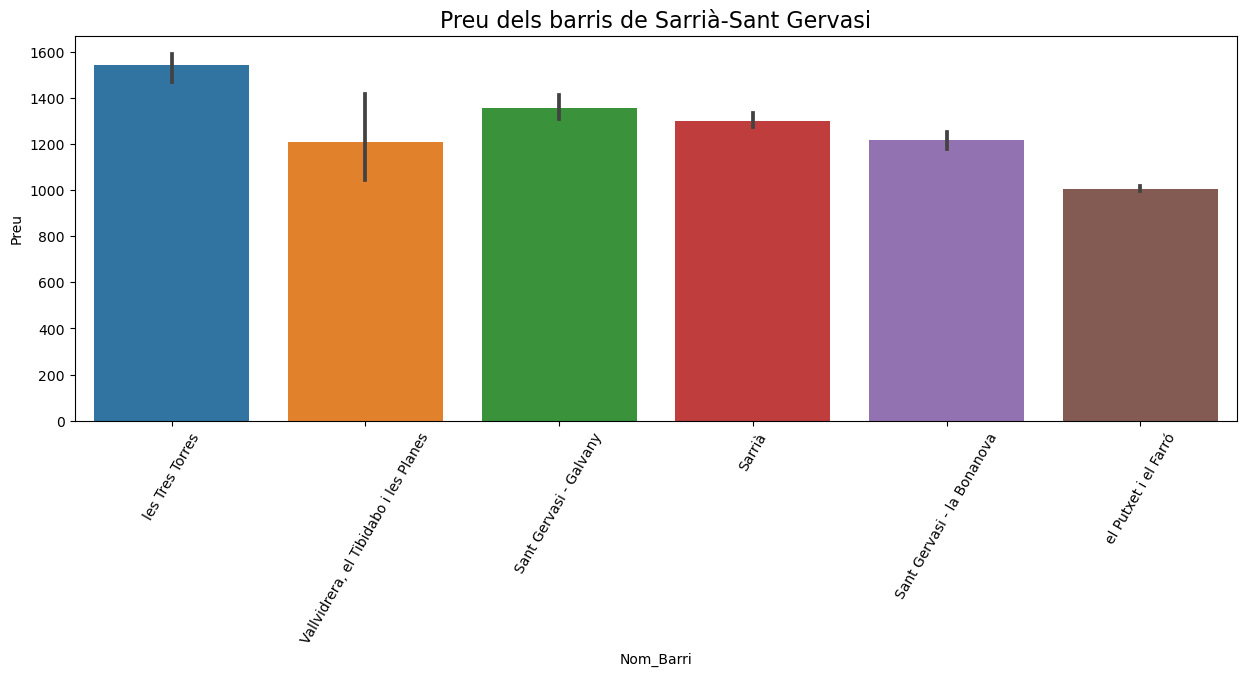

In [226]:
sns.barplot(x="Nom_Barri", y='Preu', data=llog_m.loc[llog_m.Nom_Districte == 'Sarrià-Sant Gervasi'].sort_values('Preu', ascending=False))
plt.title("Preu dels barris de Sarrià-Sant Gervasi", size=16)
plt.xticks(rotation = 60)
plt.savefig('grafic_barris.png')
plt.show()

Aquest gràfic de barres mostra la mitjana del preu de cada barri del districte de Sarrià-Sant Gervasi. La barra negra representa la desviació estàndar de les dades, o sigui el valor que pot prendre el preu en aquell barri.